# Usage
* <'date'> date

Note : app_date.csv must be copied to data directory

Top regions by total inq stall are displayed followed by a 3d visualisation for app workload and congestion

In [1]:
date = 20180925

In [2]:
from unix_timestamp import *
timestamp =get_unix_time(date)

In [3]:
path_to_csv = '/data/'+str(date)+'_app.csv'

In [4]:
import pandas as pd
appDF = pd.read_csv(path_to_csv,sep='\t')
appDF = appDF[['jobid','jobname','start','end','node_count','shape_x','shape_y','shape_z','origin_x','origin_y','origin_z']]
# appDF = parse_df(appDF,timestamp)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7,8,9,10,11,14,20,21,22,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
from app_viz_utils import *
bucket_to_apps = get_bucket_to_apps(appDF,timestamp)

Done with computing 10000 rows
Done with computing 20000 rows
Done with computing 30000 rows
Done with computing 40000 rows
Done with computing 50000 rows
Done with computing 60000 rows
3


In [6]:
print(len(bucket_to_apps))

1440


In [7]:
file_path = '/outputs/segment/regions_unique_2_4-4-2-20_'+str(date)
get_important_regions(file_path)

Done with processing  100
Done with processing  200
Done with processing  300
Done with processing  400
Done with processing  500
Done with processing  600
Done with processing  700
Done with processing  800
Done with processing  900
Done with processing  1000
Done with processing  1100
Done with processing  1200
Done with processing  1300
Done with processing  1400
Region Description : Region Number 357 Bucket Number 21 Total inq stall 119322
Region Description : Region Number 7706 Bucket Number 494 Total inq stall 116865
Region Description : Region Number 8734 Bucket Number 562 Total inq stall 115500
Region Description : Region Number 373 Bucket Number 22 Total inq stall 115005
Region Description : Region Number 428 Bucket Number 25 Total inq stall 114646
Region Description : Region Number 6158 Bucket Number 395 Total inq stall 112556
Region Description : Region Number 6121 Bucket Number 393 Total inq stall 111255
Region Description : Region Number 6107 Bucket Number 392 Total inq st

<IPython.core.display.Javascript object>


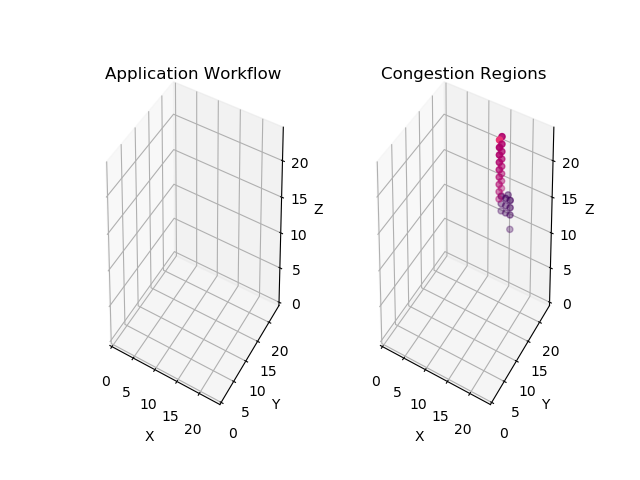

Tab()

BoundedIntText(value=100, description='Bucket(Time in mins):', max=1440, min=1)

In [9]:
%matplotlib notebook
text = widgets.BoundedIntText(value=100,min=1,max=1440,step=1,description='Bucket(Time in mins):',disabled=False)
def new_time(b):
    bucket = int(b.owner.value)
    draw(fig,ax,ax2,tab,file_path,bucket,bucket_to_apps)
    
fig = plt.figure()
fig.set_label('Congestion Analyser')
ax = fig.add_subplot(121,projection='3d')
ax.set_xlim([0,24])
ax.set_ylim([0,24])
ax.set_zlim([0,24])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Application Workflow')
ax2 = fig.add_subplot(122,projection='3d')
ax2.set_xlim([0,24])
ax2.set_ylim([0,24])
ax2.set_zlim([0,24])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Congestion Regions')

text.observe(new_time)
tab = widgets.Tab()
display(tab)
display(text)
draw(fig,ax,ax2,tab,file_path,100,bucket_to_apps)